# IFT6135-A2022
# Assignment 1: Practical

Vous devez remplir vos réponses dans ce Notebook, après quoi vous devez exporter ce Notebook vers un fichier Python nommé `solution.py` et le soumettre sur Gradescope.

N'éditez pas les fonctions spécifiées dans le PDF (et partout où cela est indiqué - `# WRITE CODE HERE`). Ne changez pas les définitions et ne modifiez pas le reste du modèle, sinon l'autograde ne fonctionnera pas.

**Assurez-vous de demander un runtime GPU (surtout pour la question 3) !**

In [ ]:
# DO NOT MODIFY!
import matplotlib.pyplot as plt
import numpy as np
import random

# Fix random seed
random.seed(0)
np.random.seed(0)

## Question 1: Implementing MLPs with NumPy (30 points)

In [ ]:
class NN(object):
  """
    Implements an MLP.
  """

  def __init__(self,
               dims=(784, 128, 64, 10), # h_0, h_1, h_2, h_3
               activation="relu",       # Activation function
               epsilon=1e-6,            # Correction factor
               lr=0.01,                 # Learning rate
               seed=0                   # Random seed
              ):
    """
      Constructor of the NN class.

      dims: list or tuple or np.array, default (784, 128, 64, 10)
        Valeurs de h_0 (nombre de caractéristiques), h_1 (dim. cachée 1), h_2 (dim. cachée 2), h_3 (nombre de classes de sortie).
      activation: string, default "relu"
        La fonction d'activation.
      epsilon: float or double, default 1e-6
        Facteur de correction des probabilités.
      lr: float or double, default 0.01
        Taux d'apprentissage.
      seed: int, default 0
        Random seed.
    """
    super(NN, self).__init__()

    self.dims = dims
    self.n_hidden = len(dims) - 2
    self.activation_str = activation
    self.epsilon = epsilon
    self.lr = lr
    self.seed = seed

  def initialize_weights(self):
    """
      Résultats : Initialise les weights du MLP à partir de uniform(-1/sqrt(h_0), 1/sqrt(h_0)) et les biais à zéro.
    """
    if self.seed is not None:
      np.random.seed(self.seed)

    self.weights = {}
    # self.weights is a dictionary with keys W1, b1, W2, b2, ..., Wm, Bm where m - 1 is the number of hidden layers
    # The keys W1, W2, ..., Wm correspond to weights while b1, b2, ..., bm correspond to biases
    for layer_n in range(1, self.n_hidden + 2):
      # WRITE CODE HERE
      racine = 1/np.sqrt(self.dims[0])
      self.weights[f"W{layer_n}"] = np.random.uniform(-racine,racine,(self.dims[layer_n-1],self.dims[layer_n]))
      self.weights[f"b{layer_n}"] = np.zeros((1, self.dims[layer_n]))

  def relu(self, x, grad=False):
    """
      x: np.array
        Entrées pour lesquelles calculer ReLU(x). x peut contenir un batch d'entrées !
      grad: bool, default False
        Si True, retourne le gradient de l'activation par rapport aux entrées de la fonction.

      Outputs: Implémente la fonction d'activation ReLU ou son gradient.
    """

    if grad:
      # WRITE CODE HERE
      output = (x > 0)
      output = np.multiply(output,1)
      return output
      pass
    # WRITE CODE HERE
    output = np.maximum(x,0)
    return output
    pass
    return 0

  def sigmoid(self, x, grad=False):
    """
      x: np.array
        Entrées pour lesquelles calculer sigmoid(x). x peut contenir un batch d'entrées !
      grad: bool, default False
        Si True, retourne le gradient de l'activation par rapport aux entrées de la fonction.

      Outputs: Implémente la fonction d'activation sigmoid ou son gradient.
    """
    sig = 1/(1+np.exp(-x))
    if grad:
      # WRITE CODE HERE
      return sig*(1-sig)
      pass
    # WRITE CODE HERE
    return sig
    pass
    return 0

  def tanh(self, x, grad=False):
    """
      x: np.array
        Entrées pour lesquelles calculer tanh(x). x peut contenir un batch d'entrées !
      grad: bool, default False
        Si True, retourne le gradient de l'activation par rapport aux entrées de la fonction.

      Outputs: Implémente la fonction d'activation tanh ou son gradient.
    """
    th = np.tanh(x)
    if grad:
      # WRITE CODE HERE
      return 1 - th*th
      pass
    # WRITE CODE HERE
    return th
    pass
    return 0

  def activation(self, x, grad=False):
    """
      x: np.array
        Entrées pour calculer l'activation(x). x peut contenir un batch d'entrées !
      grad: bool, default False
        Si True, retourne le gradient de l'activation par rapport aux entrées de la fonction.

      Outputs: Retourne la valeur de l'activation ou le gradient.
    """
    if self.activation_str == "relu":
      # WRITE CODE HERE
      return self.relu(x,grad)
      pass
    elif self.activation_str == "sigmoid":
      # WRITE CODE HERE
      return self.sigmoid(x,grad)
      pass
    elif self.activation_str == "tanh":
      # WRITE CODE HERE
      return self.tanh(x,grad)
      pass
    else:
      raise Exception("Invalid activation")
    return 0

  def softmax(self, x):
    """
      x: np.array
        Entrées pour calculer le softmax. x peut contenir un batch d'entrées !

      Outputs: Implémente la fonction softmax, renvoie l'array contenant softmax(x).
    """
    # Remember that softmax(x-C) = softmax(x) when C is a constant.
    # WRITE CODE HERE
    n = len(x[0])
    e = np.exp(x -np.max(x))
    somme_1 = np.sum(e,axis = -1)
    somme_redim = np.repeat(somme_1,n).reshape(x.shape)
    return e/somme_redim
    pass
    return 0

  def forward(self, x):
    """
      x: np.array
        Entrées du MLP. Notez que x peut contenir plusieurs exemples d'entrée.

      Outputs: Implémente la passe forward, retourne le cache comme décrit ci-dessous.
    """
    cache = {"Z0": x}
    # le cache est un dictionnaire avec les clés Z0, A1, Z1, ..., Am, Zm où m - 1 est le nombre de couches cachées
    # Z0 contient juste les entrées x du réseau
    # Ai correspond à la préactivation de la couche i, Zi correspond à l'activation de la couche i
    # WRITE CODE HERE
    for layer_n in range(1, self.n_hidden + 1):
      cache[f"A{layer_n}"] = self.weights[f"b{layer_n}"] + np.dot(cache[f"Z{layer_n-1}"] ,self.weights[f"W{layer_n}"])
      cache[f"Z{layer_n}"] = self.activation(cache[f"A{layer_n}"],grad = False)

    cache[f"A{self.n_hidden + 1}"] = self.weights[f"b{self.n_hidden + 1}"] + np.dot(cache[f"Z{self.n_hidden}"] ,self.weights[f"W{self.n_hidden+1}"])
    cache[f"Z{self.n_hidden  +1}"] = self.softmax(cache[f"A{self.n_hidden + 1}"])
    pass

    return cache

  def loss(self, prediction, labels):
    """
      prediction: np.array
        Probabilités prédites pour chaque classe pour les entrées. Peut contenir plusieurs exemples (un batch) !
      labels: np.array
        Vraies labels correspondant aux entrées (one-hot encoded). Peut contenir plusieurs exemples (un batch) !

      Outputs: Renvoie la perte de l'entropie croisée (moyenne sur le nombre d'entrées).
    """
    prediction[np.where(prediction < self.epsilon)] = self.epsilon
    prediction[np.where(prediction > 1 - self.epsilon)] = 1 - self.epsilon

    perte = -(np.sum(np.multiply(np.log(prediction),labels)))

    return perte/len(labels)
    pass
    return 0

  def backward(self, cache, labels):
    """
      cache: np.array
        Résultats de la passe backward. Cela peut être pour plusieurs exemples (un batch).
      labels: np.array
        Vraies labels correspondant aux entrées dans le cache. Peut contenir plusieurs exemples (un batch) !

      Outputs: Implémente le backward pass, retourne les grads comme décrit ci-dessous.
    """
    output = cache[f"Z{self.n_hidden + 1}"]
    grads = {}
    # grads est un dictionnaire avec les clés dAm, dWm, dbm, dZ(m-1), dA(m-1), ..., dW1, db1
    # N'oubliez pas de prendre la moyenne du gradient sur tous les exemples d'entrée !
    # WRITE CODE HERE
    x = cache["Z0"]
    k = len(x)
    grads[f"dA{self.n_hidden+1}"] =(output - labels)
    for layer in range(1, self.n_hidden + 1):
      layer_n = self.n_hidden + 2 - layer
      grads[f"dW{layer_n}"] = np.dot(cache[f"Z{layer_n-1}"].T,grads[f"dA{layer_n}"]) / k
      grads[f"db{layer_n}"] = np.mean(grads[f"dA{layer_n}"] ,axis = 0)
      grads[f"db{layer_n}"] = grads[f"db{layer_n}"].reshape((1,len(grads[f"db{layer_n}"] )))
      grads[f"dZ{layer_n -1}"] = np.dot(grads[f"dA{layer_n}"],self.weights[f"W{layer_n}"].T)
      grads[f"dA{layer_n - 1}"] = np.multiply(grads[f"dZ{layer_n -1}"],self.activation(cache[f"A{layer_n-1}"],grad = True))
    #pour la première couche
    layer_n = 1
    grads[f"dW{layer_n}"] = np.dot(cache[f"Z{layer_n-1}"].T,grads[f"dA{layer_n}"]) / k
    grads[f"db{layer_n}"] = np.mean(grads[f"dA{layer_n}"] ,axis = 0)
    grads[f"db{layer_n}"] = grads[f"db{layer_n}"].reshape((1,len(grads[f"db{layer_n}"] )))
    pass
    return grads

  def update(self, grads):
    """
      grads: np.dictionary
        Gradients obtenus à partir de la passe backward.

      Results: Met à jour les poids et les biais du réseau.
    """
    for layer_n in range(1, self.n_hidden + 2):
      self.weights[f"W{layer_n}"] = self.weights[f"W{layer_n}"] - self.lr*grads[f"dW{layer_n}"]
      self.weights[f"b{layer_n}"] = self.weights[f"b{layer_n}"] - self.lr*grads[f"db{layer_n}"]
      pass

## Question 2: Implementing CNN layers with NumPy (20 points)
Note: You may assume that there are no biases, no input padding (valid convolution) and also that convolution here refers to cross-correlation, i.e., no kernel flipping when convolving the inputs.

In [ ]:
class Convolution2dLayer(object):
  """
    Implements a 2D convolution layer.
  """

  def __init__(self, filter_size=3, stride=1, n_units=64, seed=0):
    """
      Constructor of the Convolution2dLayer class.

      Note: Nous supposons que les images d'entrée n'ont qu'un seul canal.

      filter_size : int, default 3
        Taille du filtre à utiliser pour la convolution. Nous supposons que la hauteur et la largeur sont égales.
      stride : int, default 1
        Stride pour la convolution.
      n_units : int, default 64
        Nombre de canaux de sortie, c'est à dire le nombre de filtres dans la couche.
      seed : int, default 0
        Random seed.
    """
    super(Convolution2dLayer, self).__init__()

    self.filter_size = filter_size
    self.stride = stride
    self.n_units = n_units
    self.seed = seed

  def initialize_weights(self):
    """
      Results: Initialise les poids du CNN à partir de uniform(0, 1).
    """
    if self.seed is not None:
      np.random.seed(self.seed)

    # self.weights est un tableau np.array de forme (n_units, filter_size, filter_size)
    # Nous ne considérons pas les biais dans cette implémentation de la couche de convolution.
    self.weights = np.random.uniform(0,1,(self.n_units,self.filter_size,self.filter_size))

  def forward(self, x):
    """
      x: np.array
        Entrées. Ceci peut contenir plusieurs exemples d'entrée, pas seulement un.
        Note : Nous supposons que les images d'entrée n'ont qu'un seul canal, par exemple (5, 1, 32, 32) où 5 est le nombre d'images, 1 canal, taille d'image 32x32.
        images, 1 canal, taille de l'image 32x32.

      Outputs: Les entrées et le résultat de l'opération de convolution sur les entrées stockées dans le cache.

      Note: Vous n'avez pas besoin de 'flip' le noyau ! Vous pouvez simplement implémenter la corrélation croisée.
    """
    cache = {}
    x_features = (x.shape[2] - self.filter_size ) + 1
    y_features = (x.shape[3] - self.filter_size) + 1
    output = np.zeros((x.shape[0],self.n_units,x_features,y_features))
    # cache est un dictionnaire où cache["x"] stocke les entrées et cache["out"] stocke les sorties de la couche
    for conv in range(self.n_units):
      for k in range(x.shape[0]):
        for ind_x in range(x_features):
          for ind_y in range(y_features):
            output[k,conv,ind_x,ind_y] = np.sum(np.multiply(self.weights[conv],x[k,0,ind_x:ind_x+self.filter_size,ind_y:ind_y + self.filter_size]))
    cache["x"] = x
    cache["out"] = output

    pass
    return cache

  def backward(self, cache, grad_output):
    """
      cache: dictionary
        Contient les entrées et le résultat de l'opération de convolution qui leur est appliquée.
      grad_output: np.array
        Gradient de la perte par rapport aux sorties de la couche de convolution.

      Outputs: Gradient de la perte par rapport aux paramètres de la couche de convolution.
    """
    x = cache["x"]

    # grads est un tableau np.array contenant le gradient de la perte par rapport aux paramètres de la couche de convolution.
    # N'oubliez pas de prendre la moyenne du gradient sur tous les exemples d'entrée !


    grads = np.zeros((self.n_units,x.shape[2] - grad_output.shape[2] + 1,x.shape[2] - grad_output.shape[2] + 1))

    for conv in range(self.n_units):
      for k in range(x.shape[0]):
        for ind_x in range(x.shape[2] - grad_output.shape[2] + 1):
          for ind_y in range(x.shape[2] - grad_output.shape[2] + 1):
            grads[conv,ind_x,ind_y] = grads[conv,ind_x,ind_y] + np.sum(np.multiply(grad_output[k][conv],x[k,0,ind_x:ind_x+grad_output.shape[2],ind_y:ind_y + grad_output.shape[2]]))

    pass
    return grads


class MaxPooling2dLayer(object):
  """
    Implements a 2D max-pooling layer.
  """

  def __init__(self, filter_size=2):
    """
      Constructor of the MaxPooling2dLayer class.

      filter_size: int, default 2
        Taille du filtre à utiliser pour le max-pooling. Nous supposons que la hauteur et la largeur sont égales, et que le pas = hauteur = largeur.
    """
    super(MaxPooling2dLayer, self).__init__()

    self.filter_size = filter_size
    self.stride = filter_size

  def forward(self, x):
    """
      x: np.array
        Entrées pour lesquelles calculer le max-pooling. Ceci peut contenir plusieurs exemples d'entrée, pas seulement un.
        Note : Les dimensions d'entrée du max-pooling sont les dimensions de sortie de la convolution !

      Outputs: Les entrées et le résultat de l'opération de max-pooling sur les entrées stockées dans le cache.
    """
    cache = {}

    # cache est un dictionnaire où cache["x"] stocke les entrées et cache["out"] stocke les sorties de la couche
    # WRITE CODE HERE
    output = np.zeros((x.shape[0],x.shape[1],int(x.shape[2]/2),int(x.shape[3]/2)))
    cache["x"] = x
    for k in range(x.shape[0]):
      for unit in range(x.shape[1]):
        for i in range(output.shape[2]):
          for j in range(output.shape[3]):
            output[k,unit,i,j] = np.max(x[k,unit,2*i:2*(i+1),2*j:2*(j+1)])

    cache["out"] = output
    return cache

  def backward(self, cache, grad_output):
    """
      cache: dictionary
        Contient les entrées et le résultat de l'opération de max-pooling qui leur est appliquée.
      grad_output: np.array
        Gradient de la perte par rapport aux sorties de la couche de max-pooling.

      Outputs: Gradient de la perte par rapport aux entrées de la couche de max-pooling.
    """
    x = cache["x"]
    grads = np.zeros(x.shape) # WRITE CODE HERE (initialize grads correctly)

    # grads est un tableau np.array contenant le gradient de la perte par rapport aux entrées de la couche de max-pooling.
    # N'oubliez pas de prendre la moyenne du gradient sur tous les exemples d'entrée !
    # WRITE CODE HERE

    for k in range(x.shape[0]):
      for unit in range(x.shape[1]):
        for i in range(x.shape[2]):
          for j in range(x.shape[3]):
            if x[k,unit,i,j] == np.max(x[k,unit,2*(i//2):2*(i//2+1),2*(j//2):2*(j//2+1)]) :
              grads[k,unit,i,j] = grad_output[k,unit,i//2,j//2]

    pass
    return grads

## Question 3: Implementing a CNN and comparison with MLPs using PyTorch (50 points)

In [ ]:
# DO NOT MODIFY!
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
device = "cuda" if torch.cuda.is_available() else "cpu"
import time
# Fix random seed
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
device

'cpu'

In [ ]:
class ResidualBlock(nn.Module):
  """This class implements the Residual Block used in ResNet-18."""

  def __init__(self, in_channels, channels, conv_stride=1, activation_str="relu", initialization="xavier_normal"):
    """
      Constructor for the ResidualBlock class.

      in_channels : int
        Nombre de canaux dans l'entrée du bloc.
      channels : int
        Nombre de canaux de sortie pour le bloc, c'est-à-dire le nombre de filtres.
      conv_stride : int, par défaut 1
        Stride de la première couche de convolution et de la convolution de sous-échantillonnage (si nécessaire).
      activation_str : string, par défaut "relu" (chaîne de caractères)
        Fonction d'activation à utiliser.
      initialization : string, par défaut "xavier_normal".
        Initialisation des poids de la couche de convolution.
    """
    super(ResidualBlock, self).__init__()

    self.in_channels = in_channels
    self.channels = channels
    self.conv_stride = conv_stride
    self.activation_str = activation_str
    self.initialization = initialization

    # Define these members by replacing `None` with the correct definitions

    self.conv1 = nn.Conv2d(in_channels,channels,kernel_size = 3,stride = self.conv_stride,padding = 1, bias = False) # WRITE CODE HERE
    self.bn1 = nn.BatchNorm2d(channels)   # WRITE CODE HERE
    self.conv2 = nn.Conv2d(channels,channels,kernel_size = 3, stride = 1,padding = 1, bias = False) # WRITE CODE HERE
    self.bn2 = nn.BatchNorm2d(channels)   # WRITE CODE HERE

    self.residual_connection = self.residual(in_channels, channels, conv_stride)

    # Initialize weights for conv1 and conv2
    if initialization == "xavier_normal":
      nn.init.xavier_normal_(self.conv1.weight)
      nn.init.xavier_normal_(self.conv2.weight)
      pass
    elif initialization == "xavier_uniform":
      nn.init.xavier_uniform_(self.conv1.weight)
      nn.init.xavier_uniform_(self.conv2.weight)
      pass
    elif initialization == "kaiming_normal":
      nn.init.kaiming_normal_(self.conv1.weight)
      nn.init.kaiming_normal_(self.conv2.weight)
      pass
    else:
      raise Exception("Invalid initialization")

  def activation(self, input):
    """
      entrée : Tensor
        Entrée sur laquelle l'activation est appliquée.

      Sortie : Résultat de la fonction d'activation appliquée à l'entrée.
        Par exemple, si self.activation_str est "relu", retourne relu(input).
    """

    if self.activation_str == "relu":
      return nn.ReLU()(input)
      pass
    elif self.activation_str == "tanh":
      return nn.Tanh()(input)
      pass
    else:
      raise Exception("Invalid activation")
    return 0

  def residual(self, in_channels, channels, conv_stride=1):
    """
      in_channels : int
        Nombre de canaux d'entrée dans l'entrée du bloc.
      channels : int
        Nombre de canaux de sortie pour le bloc, c'est-à-dire le nombre de filtres.
      conv_stride : int, par défaut 1
        Stride à utiliser pour le sous-échantillonnage de la convolution 1x1.

      Sortie : Retourne un objet nn.Sequential qui calcule la fonction d'identité de l'entrée si stride est 1
              et que le nombre de canaux d'entrée est égal au nombre de canaux de sortie. Sinon, il retourne un objet
              nn.Sequential qui sous-échantillonne son entrée en utilisant un 1x1-conv du stride spécifié et un BatchNorm2.
              suivi d'un BatchNorm2d.
    """
    layers = []
    if conv_stride != 1 or in_channels != channels:
      layers.append(nn.Conv2d(in_channels,channels,kernel_size=(1,1),stride = conv_stride,padding = 0,bias = False ))
      layers.append(nn.BatchNorm2d(channels))
      pass
    return nn.Sequential(*layers)

  def forward(self, x):
    """
      x : Tensor
        Entrée du bloc.

      Sorties : Renvoie la sortie de la passe avant du bloc.
    """
    out1 = self.conv1(x)
    norm1 = self.bn1(out1)
    act1 = self.activation(norm1)
    out2 = self.conv2(act1)
    norm2 = self.bn2(out2)
    x_reshape = self.residual_connection(x)
    return self.activation(norm2 + x_reshape)
    pass
    return 0

In [ ]:
class ResNet18(nn.Module):
  """This class implements the ResNet-18 architecture from its components."""

  def __init__(self, activation_str="relu", initialization="xavier_normal"):
    """
      Constructor for the ResNet18 class.

      activation_str : string, par défaut "relu".
        Fonction d'activation à utiliser.
      initialization : string, par défaut "xavier_normal".
        Initialisation du poids à utiliser.
    """
    super(ResNet18, self).__init__()

    self.n_classes = 10
    self.activation_str = activation_str
    self.initialization = initialization

    # Define these members by replacing `None` with the correct definitions
    self.conv1 = nn.Conv2d(3,64,(3,3),stride = 1, padding = 1,bias = False)
    self.bn1 = nn.BatchNorm2d(64)
    self.layer1 = self._create_layer(64,64,1)
    self.layer2 = self._create_layer(64,128,2)
    self.layer3 = self._create_layer(128,256,2)
    self.layer4 = self._create_layer(256,512,2)
    self.avgpool = nn.AvgPool2d(4,stride = 1)
    self.linear = nn.Linear(512,self.n_classes)



  def activation(self, input):
    """
      input: Tensor
        Input on which the activation is applied.

      Output: Result of activation function applied on input.
        E.g. if self.activation_str is "relu", return relu(input).
    """
    if self.activation_str == "relu":
      return nn.ReLU()(input)
      pass # This was modified
    elif self.activation_str == "tanh":
      return torch.tanh(input)
      pass # This was modified
    else:
      raise Exception("Invalid activation")
    return 0

  def _create_layer(self, in_channels, channels, conv_stride=1):
    """
      in_channels: int
        Number of input channels present in the input to the layer.
      out_channels: int
        Number of output channels for the layer, i.e., the number of filters.
      conv_stride: int, default 1
        Stride of the first convolution layer in the block and the downsampling convolution (if required).

      Outputs: Returns an nn.Sequential object giving a "layer" of the ResNet, consisting of 2 blocks each.
    """
    # Modifiez l'instruction suivante pour retourner un objet nn.Sequential contenant 2 ResidualBlocks.
    # Vous devez vous assurer que les canaux et conv_stride appropriés sont fournis.
    layers = []
    layers.append(ResidualBlock(in_channels,channels,conv_stride,self.activation_str,self.initialization))
    layers.append(ResidualBlock(channels,channels,1,self.activation_str,self.initialization))
    return nn.Sequential(*layers)

  def get_first_conv_layer_filters(self):
    """
      Sorties : Retourne les filtres de la première couche de convolution.
    """
    return self.conv1.weight.clone().cpu().detach().numpy()

  def get_last_conv_layer_filters(self):
    """
      Sorties : Retourne les filtres de la dernière couche de convolution.
    """
    return list(self.layer4.modules())[1].conv2.weight.clone().cpu().detach().numpy()

  def forward(self, x):
    """
      x: Tensor
        Entrée du réseau.

      Sorties : Renvoie la sortie de la passe forward du réseau.


    """


    a = self.conv1(x)
    a = self.bn1(a)
    a = self.activation(a)
    a = self.layer1(a)
    a = self.layer2(a)
    a = self.layer3(a)
    a = self.layer4(a)
    a = self.avgpool(a)
    a = a.view(a.shape[0],a.shape[1])
    a = self.linear(a)

    return a

    pass
    return 0

In [ ]:
def get_cifar10():
  transform = transforms.Compose([
      transforms.ToTensor()
  ])

  train_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=True, download=True, transform=transform)
  train_loader = torch.utils.data.DataLoader(
      train_dataset, batch_size=128, shuffle=True, num_workers=2)

  val_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=False, download=True, transform=transform)
  val_loader = torch.utils.data.DataLoader(
      val_dataset, batch_size=128, shuffle=False, num_workers=2)

  return train_loader, val_loader

def train_loop(epoch, model, train_loader, criterion, optimizer):
  """
    epoch: int
      Numéro de l'époque d'apprentissage actuelle (à partir de 0).
    model: ResNet18
      Le modèle à entraîner, qui est une instance de la classe ResNet18.
    train_loader: DataLoader
      Training dataloader.
    criterion: Module
      Un objet Module qui évalue la perte de l'entropie croisée.
    optimizer: Optimizer
      Un objet Optimizer pour l'optimiseur Adam.

    Outputs: Retourne la moyenne de train_acc et train_loss pour l'époque actuelle.
  """

  train_acc = 0
  train_loss = 0
  # print(len(train_loader))
  for im_lbl in (train_loader):
    optimizer.zero_grad()

    image = im_lbl[0].to(device)
    label = im_lbl[1].to(device)
    prediction = model(image)

    loss = (criterion(prediction,label))


    accuracy = ((prediction.argmax(1) == label).sum()/len(label)).type(torch.FloatTensor)
    loss.backward()
    optimizer.step()

    train_acc = train_acc + accuracy.data.cpu().numpy()
    train_loss = train_loss + loss.data.cpu().numpy()


  train_acc = train_acc/len(train_loader)
  train_loss = train_loss/len(train_loader)


  # WRITE CODE HERE

  # print(f"Epoch: {epoch} | Train Acc: {train_acc:.6f} | Train Loss: {train_loss:.6f}")
  return train_acc, train_loss

def valid_loop(epoch, model, val_loader, criterion):
  """
    epoch: int
      Numéro de l'époque d'apprentissage actuelle (à partir de 0).
    model: ResNet18
      Le modèle à entraîner, qui est une instance de la classe ResNet18.
    val_loader: DataLoader
      The validation dataloader.
    criterion: Module
      Un objet Module qui évalue la perte de l'entropie croisée.

    Outputs: Retourne la moyenne de val_acc et val_loss pour l'époque actuelle.
  """
  val_acc = 0
  val_loss = 0
  model.eval()
  for im_lbl in (tqdm(val_loader)):

    image = im_lbl[0].to(device)
    label = im_lbl[1].to(device)
    prediction = model(image)

    accuracy = ((prediction.argmax(1) == label).sum()/len(label)).type(torch.FloatTensor)

    loss = (criterion(prediction,label))

    val_acc = val_acc + accuracy.data.cpu().numpy()
    val_loss = val_loss + loss.data.cpu().numpy()


  val_acc = val_acc/len(val_loader)
  val_loss = val_loss/len(val_loader)

  # print(f"Epoch: {epoch} | Val Acc: {val_acc:.6f}   | Val Loss: {val_loss:.6f}")
  return val_acc, val_loss

In [ ]:
# activation_str = "tanh"


In [ ]:
  model = ResNet18(
    activation_str="relu",
    initialization="xavier_normal"
  ).to(device)

In [ ]:
model_mlp = nn.Sequential(
        nn.Linear(3*32*32,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,256),
        nn.ReLU(),
        nn.Linear(256,256),
        nn.ReLU(),
        nn.Linear(256,32),
        nn.ReLU(),
        nn.Linear(32,32),
        nn.ReLU(),
        nn.Linear(32,16),
        nn.Linear(16,10)
).to("cuda")
import numpy as np
model_parameters = filter(lambda p: p.requires_grad, model_mlp.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])

In [ ]:
activation_str="relu"

In [ ]:
train_loader, val_loader  =get_cifar10()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import pickle
from tqdm import tqdm
import time
for initialization in tqdm(["xavier_normal"]):

  deb = time.time()
  val_accs, val_losses , train_accs , train_losses = [], [] , [], []
  n_epochs = 35


  model = ResNet18(
    activation_str="relu",
    initialization=initialization
  ).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(),weight_decay = 0.001)



  for epoch in tqdm(range(n_epochs)):
    # Training
    train_acc, train_loss = train_loop(epoch, model, train_loader, criterion, optimizer)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Validation
    val_acc, val_loss = valid_loop(epoch, model, val_loader, criterion)
    val_accs.append(val_acc)
    val_losses.append(val_loss)

  fin = time.time() - deb

  with open(f"val_acc_{activation_str}_"+f"{initialization}.pkl","wb") as f:
    pickle.dump(val_accs,f)

  with open(f"val_losses_{activation_str}_"+f"{initialization}.pkl","wb") as f:
    pickle.dump(val_losses,f)



  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  1%|▏         | 1/79 [00:00<00:09,  8.23it/s]

 14%|█▍        | 11/79 [00:00<00:01, 57.56it/s]

 28%|██▊       | 22/79 [00:00<00:00, 79.52it/s]

 42%|████▏     | 33/79 [00:00<00:00, 89.83it/s]

 56%|█████▌    | 44/79 [00:00<00:00, 96.67it/s]

 70%|██████▉   | 55/79 [00:00<00:00, 99.54it/s]

 84%|████████▎ | 66/79 [00:00<00:00, 101.73it/s]

100%|██████████| 79/79 [00:00<00:00, 86.92it/s] 

  3%|▎         | 1/35 [00:12<06:50, 12.08s/it]

  0%|          | 0/79 [00:00<?, ?it/s]

  1%|▏         | 1/79 [00:00<00:09,  8.23it/s]

 15%|█▌        | 12/79 [00:00<00:01, 60.59it/s]

 28%|██▊       | 22/79 [00:00<00:00, 74.55it/s]

 43%|████▎     | 34/79 [00:00<00:00, 88.23it/s]

 57%|█████▋    | 45/79 [00:00<00:00, 93.32it/s]

 71%|███████   | 56/79 [00:00<00:00, 98.01it/s]

 85%|████████▍ | 67/79 [00:00<00:00, 100.23it/s]

100%|██████████| 79/79 [00:00<00:00, 85.47it/s] 

  6%|▌         | 2/35 [00:23<06:30, 11.83s/it]

In [ ]:
val_accs[-1]

0.7030261075949367

In [ ]:
  for epoch in tqdm(range(5)):
    # Training
    train_acc, train_loss = train_loop(epoch, model, train_loader, criterion, optimizer)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Validation
    val_acc, val_loss = valid_loop(epoch, model, val_loader, criterion)
    val_accs.append(val_acc)
    val_losses.append(val_loss)

In [ ]:
val_accs

In [ ]:
# with open("train_accs.pkl","rb") as f:
#   train_accs = pickle.load(f)
# with open("train_losses.pkl","rb") as f:
#   train_losses = pickle.load(f)
# with open("val_accs.pkl","rb") as f:
#   val_accs = pickle.load(f)
# with open("val_losses.pkl","rb") as f:
#   val_losses =pickle.load(f)

In [ ]:
# with open("val_losses_relu_xavier_uniform.pkl","rb") as f:
#   val_accs_relu_xavier_uniform = pickle.load(f)
# with open("val_losses_relu_kaiming_normal.pkl","rb") as f:
#   val_accs_relu_kaiming_normal = pickle.load(f)
# with open("val_losses_tanh_xavier_uniform.pkl","rb") as f:
#   val_accs_tanh_xavier_uniform = pickle.load(f)
# with open("val_losses_tanh_xavier_normal.pkl","rb") as f:
#   val_accs_tanh_xavier_normal = pickle.load(f)
# with open("val_losses_tanh_kaiming_normal.pkl","rb") as f:
#   val_accs_tanh_kaiming_normal = pickle.load(f)



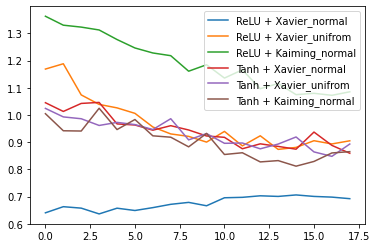

In [ ]:
import matplotlib.pyplot as plt

# %matplotlib inline

# plt.plot(val_accs[7:26])
# plt.plot(val_accs_relu_xavier_uniform[7:])
# plt.plot(val_accs_relu_kaiming_normal[7:])
# plt.plot(val_accs_tanh_xavier_uniform[7:])
# plt.plot(val_accs_tanh_xavier_normal[7:])
# plt.plot(val_accs_tanh_kaiming_normal[7:])

# plt.legend(["ReLU + Xavier_normal", "ReLU + Xavier_unifrom","ReLU + Kaiming_normal","Tanh + Xavier_normal", "Tanh + Xavier_unifrom","Tanh + Kaiming_normal"])
# plt.show()

# plt.plot(train_losses[7:])
# plt.plot(val_losses[7:])
# plt.legend(["Losse-train", "Loss-validation"])
# plt.show()

In [ ]:
# import pickle

# with open("val_accs.pkl","rb") as f:
#   x = pickle.load(f)
# len(x)

40

### Questions 3.4, 3.5, 3.6, 3.7, 3.8
You may write your own code for these questions below. These will not be autograded and you need not submit code for these, only the report.

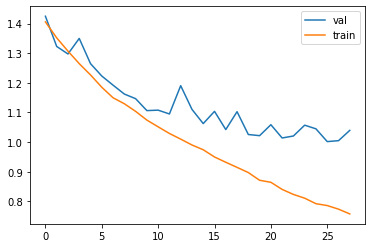

In [ ]:
# MLP Performance plot

import matplotlib.pyplot as plt

# %matplotlib inline

plt.plot(val_losses[7:])
plt.plot(train_losses[7:])
plt.legend(["val", "train"])
plt.show()

In [ ]:
# first_filter = (model.get_first_conv_layer_filters())
# last_filter = (model.get_last_conv_layer_filters())

In [ ]:
# first_filter.shape

(64, 3, 3, 3)

In [ ]:
# li  = [5,1]
# lj = [0,1]
# first_filters = []
# last_filters = []
# for i in li:
#   for j in lj:
#     first_filters.append(first_filter[i][j])
#     last_filters.append(last_filter[i][j])

<Figure size 2304x720 with 0 Axes>

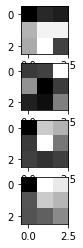

In [ ]:
# from matplotlib import pyplot as plt

# plt.figure(figsize=(len(first_filters)*8,10))
# f, axarr = plt.subplots(len(first_filters),1)
# for i,fltr in enumerate(first_filters):
#   axarr[i].imshow(fltr,cmap = 'gray')

# plt.show()

<Figure size 432x288 with 0 Axes>

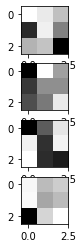

In [ ]:
# plt.figure()
# f, axarr = plt.subplots(len(last_filters),1)
# for i,fltr in enumerate(last_filters):
#   axarr[i].imshow(fltr,cmap = 'gray')

# plt.show()

In [ ]:
# plt.imshow(last_filter[0][1], cmap = 'gray')
# plt.imshow(last_filter[0][1], cmap = 'gray')
# plt.imshow(last_filter[0][1], cmap = 'gray')
# plt.imshow(last_filter[0][1], cmap = 'gray')

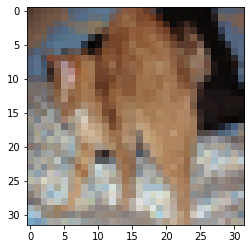

In [ ]:
# # For Q 3.6

# import matplotlib.pyplot as plt
# vis_image = None
# a = []
# for data, labels in val_loader:
#   a.append(data)
#   vis_image = data[12].unsqueeze(0)
#   plt.imshow(vis_image.squeeze().permute(1, 2, 0).cpu().detach().numpy())

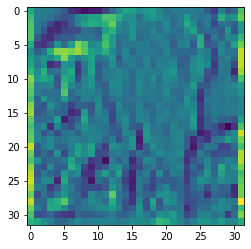

In [ ]:
# #first layer pics

# new_pic = model.conv1(vis_image.to(device))
# vis_image.squeeze()[0].shape
# plt.imshow(new_pic.squeeze()[30].cpu().detach().numpy())

torch.Size([1, 3, 32, 32]) ___
torch.Size([1, 64, 32, 32])
bn1 torch.Size([1, 64, 32, 32])
activ torch.Size([1, 64, 32, 32])
1 torch.Size([1, 64, 32, 32])
2 torch.Size([1, 128, 16, 16])
3 torch.Size([1, 256, 8, 8])
4 torch.Size([1, 512, 4, 4])


torch.Size([1, 512, 4, 4])

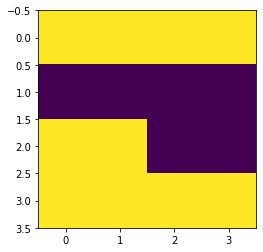

In [ ]:
# #last layer pics
# print(vis_image.shape,'___')
# a = model.conv1(vis_image.to(device))
# print(a.shape)
# a = model.bn1(a)
# print("bn1",a.shape)
# a = model.activation(a)
# print("activ",a.shape)
# a = model.layer1(a)
# print("1",a.shape)
# a = model.layer2(a)
# print("2",a.shape)
# a = model.layer3(a)
# print("3",a.shape)
# a = model.layer4(a)
# print("4", a.shape)

# plt.imshow(a.squeeze()[510].cpu().detach().numpy())
# a.shape


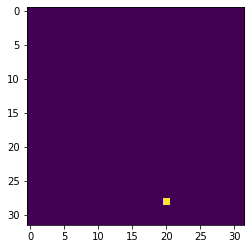

In [ ]:
# vis_image = convolve2D(a[-1][12][0], first_filters[0], padding = 0, strides = 1)
# a[-1][12][0].shape
# vis_image.shape
# plt.imshow(vis_image.cpu().detach().numpy())


In [ ]:
# a[-1][12][0]

3 3
3 32
3 32
3 32
3 32


<Figure size 2304x720 with 0 Axes>

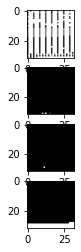

In [ ]:
# filtered = convolve2D(a[-1][12], first_filters[0])
# plt.figure(figsize=(len(first_filters)*8,10))
# f, axarr = plt.subplots(len(first_filters),1)
# for i,fltr in enumerate(first_filters):
#   filtered_r = (convolve2D(a[-1][12][0], fltr))

#   axarr[i].imshow(filtered_r,cmap="gray")

# plt.show()


In [ ]:
# convolve2D(a[-1][12][0], fltr)

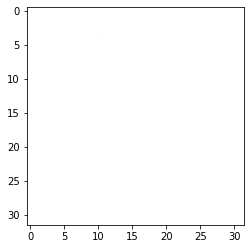

In [ ]:
# filtcv2 = cv2.filter2D(a[-1][12].cpu().numpy(),-1,first_filters[3])*255
# plt.imshow(torch.Tensor(filtcv2).permute(1,2,0).cpu().detach().numpy())

In [ ]:
lr0 = 0.01
model_mlp = nn.Sequential(
        nn.Linear(3*32*32,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,256),
        nn.ReLU(),
        nn.Linear(256,256),
        nn.ReLU(),
        nn.Linear(256,32),
        nn.ReLU(),
        nn.Linear(32,32),
        # nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(32,16),
        # nn.BatchNorm1d(64),
        nn.Linear(16,10)
).to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=0.1)

NameError: ignored

In [ ]:
# loss.grad

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [ ]:
def adjust_lr(optimizer, epoch, total_epochs):
    lr = lr0 * (0.1 ** (epoch / float(total_epochs)))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [ ]:
def accuracy(proba, y):
    correct = (proba.argmax(1) == y).sum().type(torch.FloatTensor)
    return correct / y.size(0)

def evaluate(dataset_loader, criterion):
    LOSSES = 0
    COUNTER = 0

    for batch in dataset_loader:
        optimizer.zero_grad()
        x, y = batch
        x = x.view(-1,3*32*32)
        y = y.view(-1)

        x = x.to(device)
        y = y.to(device)

        loss = criterion(mlp(x), y)
        n = y.size(0)
        LOSSES += loss.sum().data.cpu().numpy() * n
        COUNTER += n
    return LOSSES / float(COUNTER)

In [ ]:
train_loader, val_loader = get_cifar10()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
train_loader, test_loader = get_cifar10()

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms

criterion = nn.CrossEntropyLoss()

class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(3*32*32,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,256),
        nn.ReLU(),

        nn.Linear(256,256),
        nn.ReLU(),
        nn.Linear(256,32),
        nn.ReLU(),
        nn.Linear(32,32),
        # nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(32,16),
        # nn.BatchNorm1d(64),
        nn.Linear(16,10)
).to("cuda")



  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

a = time.time()
if __name__ == '__main__':
  learning_curve_nll_train = []
  learning_curve_nll_test = []
  learning_curve_acc_train = []
  learning_curve_acc_test = []

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare CIFAR-10 dataset
  trainloader = train_loader

  # Initialize the MLP
  mlp = MLP()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

  # Run the training loop
  for epoch in range(0, 25): # 5 epochs at maximum

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      # Get inputs
      inputs, targets = data
      inputs = inputs.to(device)
      targets = targets.to(device)
      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = mlp(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      current_loss += loss.item()
    train_loss = evaluate(train_loader, criterion)
    learning_curve_nll_train.append(train_loss)
    test_loss = evaluate(test_loader, criterion)
    learning_curve_nll_test.append(test_loss)

    train_acc = evaluate(train_loader, accuracy)
    learning_curve_acc_train.append(train_acc)
    test_acc = evaluate(test_loader, accuracy)
    learning_curve_acc_test.append(test_acc)
    print("loss", loss)
    print("accuracy" ,accuracy(outputs,targets))

  # Process is complete.
  print('Training process has finished.')
  d = time.time() -a



Starting epoch 1
loss tensor(2.0361, device='cuda:0', grad_fn=<NllLossBackward0>)
accuracy tensor(0.1875)
Starting epoch 2
loss tensor(2.0419, device='cuda:0', grad_fn=<NllLossBackward0>)
accuracy tensor(0.1000)
Starting epoch 3
loss tensor(1.9533, device='cuda:0', grad_fn=<NllLossBackward0>)
accuracy tensor(0.1500)
Starting epoch 4
loss tensor(1.9218, device='cuda:0', grad_fn=<NllLossBackward0>)
accuracy tensor(0.1750)
Starting epoch 5
loss tensor(1.9429, device='cuda:0', grad_fn=<NllLossBackward0>)
accuracy tensor(0.1875)
Starting epoch 6
loss tensor(1.8720, device='cuda:0', grad_fn=<NllLossBackward0>)
accuracy tensor(0.1000)
Starting epoch 7
loss tensor(1.8470, device='cuda:0', grad_fn=<NllLossBackward0>)
accuracy tensor(0.2500)
Starting epoch 8
loss tensor(1.7891, device='cuda:0', grad_fn=<NllLossBackward0>)
accuracy tensor(0.3125)
Starting epoch 9
loss tensor(1.6871, device='cuda:0', grad_fn=<NllLossBackward0>)
accuracy tensor(0.2375)
Starting epoch 10
loss tensor(1.8210, device='

In [ ]:
d

612.1659352779388

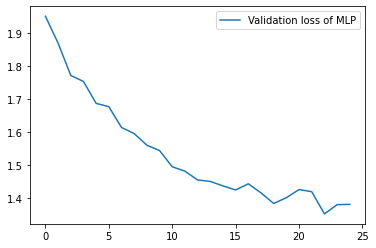

In [ ]:
import matplotlib.pyplot as plt

# %matplotlib inline

plt.plot(learning_curve_nll_test)

plt.legend(["Validation loss of MLP"])
plt.show()